In [5]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Posterior')

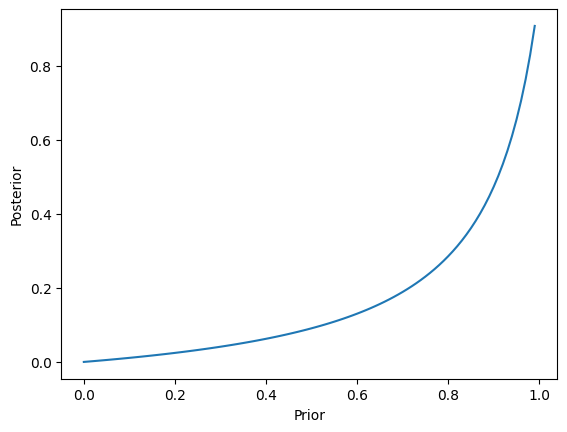

In [8]:
prior = np.arange(0,1,0.01)
plt.plot(prior, prior / (10 - 9*prior))
plt.xlabel("Prior")
plt.ylabel("Posterior")

In [11]:
# 2 alternatives, but could be more
n_alternatives = 2
prior = np.ones(n_alternatives)/n_alternatives

In [12]:
# no data involved! subjective belief
prior[0] # the probability of innocence
prior[1] # the probability of guilty

array([0.5, 0.5])

In [64]:
# likelihood[data][hypothesis] # gives us the probability of the data, given the hypothesis
n_outcomes = 2
likelihood = np.zeros([n_outcomes, n_alternatives])
TNR = 0.9 # true negative rate
TPR = 0.8 # true positive rate
likelihood[0][0] = TNR # negative test, no covid
likelihood[1][0] = 1 - TNR # positive test, no covid
likelihood[0][1] = 1 - TPR # negative test, covid
likelihood[1][1] = TPR # positive test, covid


In [65]:
def posterior(prior, likelihood, data):
    n_alternatives = len(prior)
    evidence = np.zeros(n_alternatives)
    for hypothesis in range(n_alternatives):
        evidence[hypothesis] = likelihood[data][hypothesis] * prior[hypothesis] # P(D|H) P(H)
    posterior = evidence / np.sum(evidence)
    return posterior
    #for hypothesis in range(n_alternatives):
    #    posterior[hypothesis] = evidence[hypothesis] / np.sum(evidence)

In [66]:
posterior(prior, likelihood, 1)

array([0.92523364, 0.07476636])

Text(0.5, 1.0, 'Innocence probability')

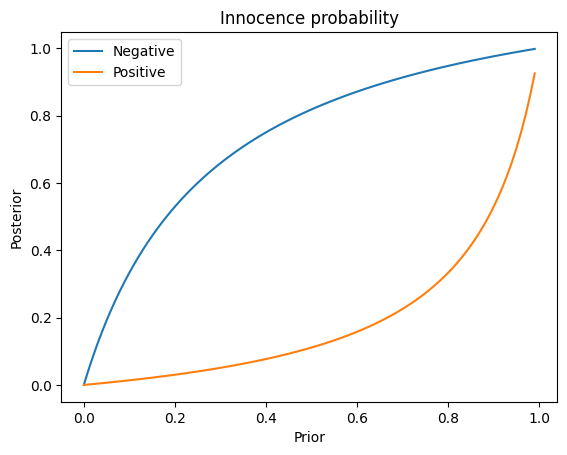

In [67]:
Q = np.arange(0,1,0.01)
post_pos = np.zeros(len(Q))
post_neg = np.zeros(len(Q))

for k in range(len(Q)):
    prior[0] = Q[k]
    prior[1] = 1 - Q[k]
    post_pos[k] = posterior(prior, likelihood, 1)[0]
    post_neg[k] = posterior(prior, likelihood, 0)[0]

plt.plot(Q, post_neg)
plt.plot(Q, post_pos)
plt.legend(["Negative", "Positive"])
plt.xlabel("Prior")
plt.ylabel("Posterior")
plt.title("Innocence probability")

In [40]:
pl

array([nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [75]:
beta=np.arange(0,1,0.001)
# beta is the probability of heads
def ber_likelihood(beta, x):
    return np.power(beta, np.sum(x))*np.power(1 - beta, np.sum(1 - x))

Text(0.5, 0, '$\\beta$')

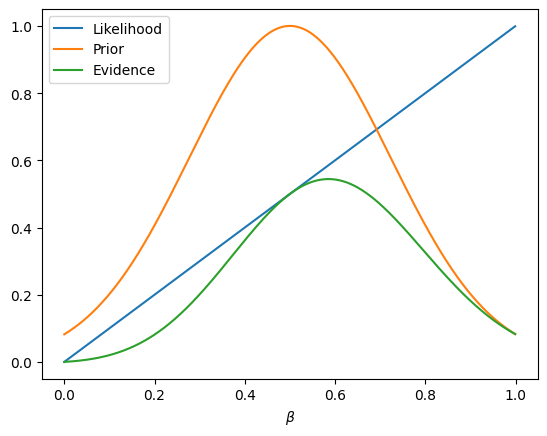

In [98]:
x = np.array([1,0,0,0,1,1])
x = np.array([1])
prior = np.exp(-10*(beta - 0.5)**2)
#prior /= np.sum(prior)
plt.plot(beta, ber_likelihood(beta, x))
plt.plot(beta, prior)
plt.plot(beta, prior*ber_likelihood(beta, x))

#plt.plot(beta, prior)

plt.legend(["Likelihood", "Prior", "Evidence"])
plt.xlabel("$\\beta$")